##  AV-FRACTAL Hackathon Regression Problem

### Hypothesis Generation:

**Univariate**

    * Maximum courses will be from software marketing
    * Maximum course type will be of course
    * Short promotion will have higher frequency
    * Long promotion will have lower frequency
    * Competition metric will have a skewed distribution

**Bivariate**

    * Software marketing domin will have Higher sales
    * Course in course type will have higher sales
    * If the short promotion is on Sales will be higher
    * If the long promotion are on sales will be lower
    * If public holiday is there then sales will be higher
    * If user traffic is more then sales will be higher
    * If Competition is more then sales will be less
    


In [109]:
## Reading the data:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [110]:
train.shape

(512087, 11)

In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512087 entries, 0 to 512086
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  512087 non-null  int64  
 1   Day_No              512087 non-null  int64  
 2   Course_ID           512087 non-null  int64  
 3   Course_Domain       512087 non-null  object 
 4   Course_Type         512087 non-null  object 
 5   Short_Promotion     512087 non-null  int64  
 6   Public_Holiday      512087 non-null  int64  
 7   Long_Promotion      512087 non-null  int64  
 8   User_Traffic        512087 non-null  int64  
 9   Competition_Metric  510323 non-null  float64
 10  Sales               512087 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 43.0+ MB


In [112]:
test.isnull().sum()

ID                      0
Day_No                  0
Course_ID               0
Course_Domain           0
Course_Type             0
Short_Promotion         0
Public_Holiday          0
Long_Promotion          0
Competition_Metric    120
dtype: int64

In [113]:
train.isnull().sum()

ID                       0
Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

In [114]:
train.describe()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,510323.000000,512087.000000
mean,274007.300650,434.917869,300.388344,0.380244,0.031639,0.488968,15375.101198,0.073345,120.826924
std,158228.834029,256.044161,173.365787,0.485447,0.175038,0.499879,7727.231205,0.100115,54.355258
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,136962.500000,214.000000,150.000000,0.000000,0.000000,0.000000,10584.000000,0.010000,84.000000
50%,273984.000000,427.000000,300.000000,0.000000,0.000000,0.000000,13776.000000,0.035000,111.000000
75%,411065.500000,658.000000,451.000000,1.000000,0.000000,1.000000,18123.000000,0.094000,146.000000
max,548027.000000,882.000000,600.000000,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


### Univariate Analysis

**Hypothesis 1: Maximum courses will be from software marketing**

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Development'),
  Text(1, 0, 'Software Marketing'),
  Text(2, 0, 'Finance & Accounting'),
  Text(3, 0, 'Business')])

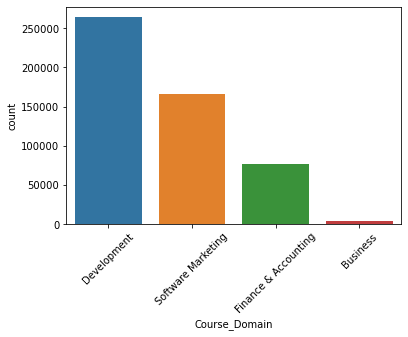

In [7]:
sns.countplot(x = 'Course_Domain', data=train)
plt.xticks(rotation=45)

* So our hypothesis doesn't hold true here

**Hypothesis 2: Maximum course type will be of course**

<AxesSubplot:xlabel='Course_Type', ylabel='count'>

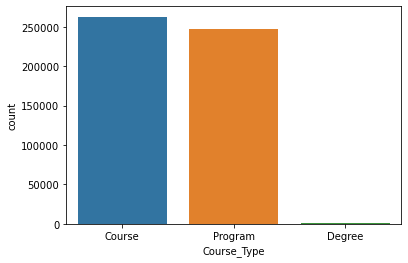

In [8]:
sns.countplot(x = 'Course_Type', data=train)

* Our Hypothesis hold true here since Course are the most frequent in number.

**Hypothesis 3: Short promotion will have higher frequency**

<AxesSubplot:xlabel='Short_Promotion', ylabel='count'>

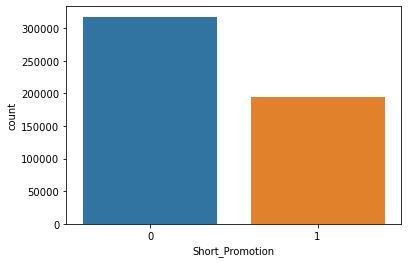

In [9]:
sns.countplot(x = 'Short_Promotion', data=train)

* So here our hypothesis doesn't hold true as we dont have short promotion frequency more than the not promoted one

**Hypothesis 4: Long promotion will have lower frequency**

<AxesSubplot:xlabel='Long_Promotion', ylabel='count'>

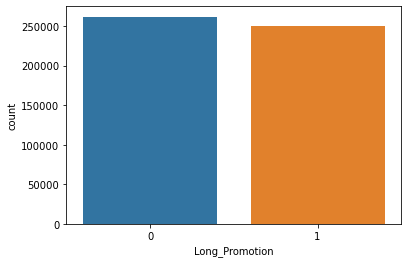

In [10]:
sns.countplot(x = 'Long_Promotion', data=train)

* Long promotion are more frequent as it must be running all the times excluding few of the times in a year

**Hypothesis 5: Competition metric will have a skewed distribution**

<AxesSubplot:xlabel='Competition_Metric', ylabel='Density'>

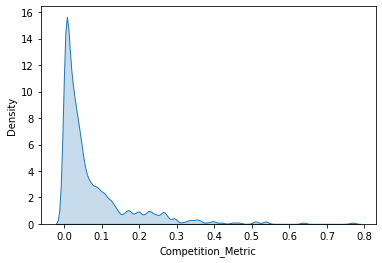

In [11]:
sns.kdeplot(x= 'Competition_Metric', data = train, shade = True)

<AxesSubplot:xlabel='Competition_Metric', ylabel='Density'>

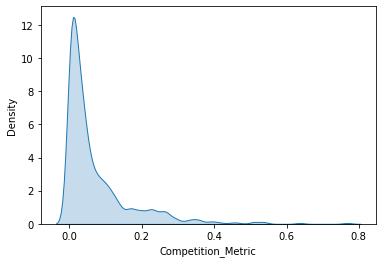

In [12]:
sns.kdeplot(x= 'Competition_Metric', data = test, shade = True)

* As suspected competition metric is highly skewed towards right

#### Since the competiton metric is a skewed distribution, we can safely replace the missing values with median for the tests and train dataset

In [115]:
train.fillna(train['Competition_Metric'].median(),inplace=True)
test.fillna(train['Competition_Metric'].median(),inplace=True)

### Checking the distribution of target variable i.e. sales

<AxesSubplot:xlabel='Sales', ylabel='Density'>

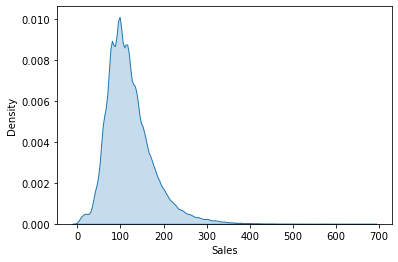

In [14]:
sns.kdeplot(x= 'Sales', data = train, shade = True)

### Bivariate Analysis

**Hypothesis 1: Software marketing domain will have Higher sales**

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Development'),
  Text(1, 0, 'Software Marketing'),
  Text(2, 0, 'Finance & Accounting'),
  Text(3, 0, 'Business')])

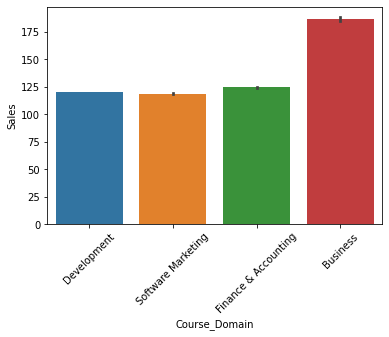

In [15]:
sns.barplot(y = 'Sales', x = 'Course_Domain', data=train)
plt.xticks(rotation = 45)

* So the sales of Business domain courses are higher in number

**Hypothesis 2: Course in course type will have higher sales**

<AxesSubplot:xlabel='Course_Type', ylabel='Sales'>

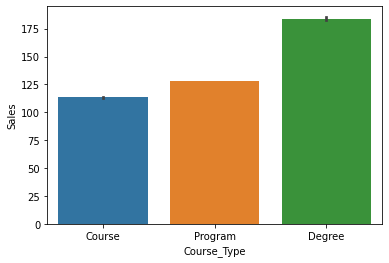

In [16]:
sns.barplot(y = 'Sales', x = 'Course_Type', data=train)

* So the degree courses has more sales than any other course type

**Hypothesis 3: If the short promotion is on Sales will be higher**

<AxesSubplot:xlabel='Short_Promotion', ylabel='Sales'>

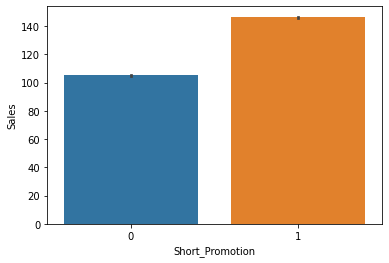

In [17]:
sns.barplot(y = 'Sales', x = 'Short_Promotion', data=train)

* So our hypothesis hold true here is that while short term promotion sales are higher

**Hypothesis 4: If the long promotion are on sales will be lower**

<AxesSubplot:xlabel='Long_Promotion', ylabel='Sales'>

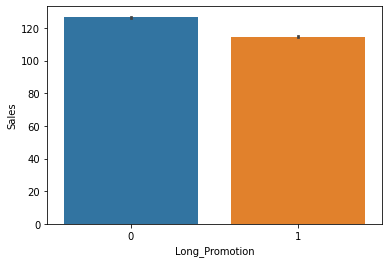

In [7]:
sns.barplot(y = 'Sales', x = 'Long_Promotion', data=train)

* So our hypothesis hold true here is that when long term promotions are in play, sales will be lower

**Hypothesis 5: If public holiday is there then sales will be higher**

<AxesSubplot:xlabel='Public_Holiday', ylabel='Sales'>

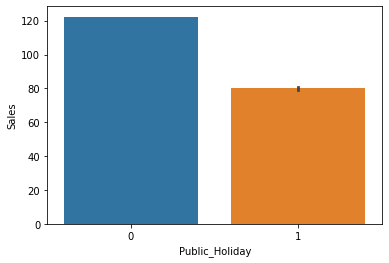

In [8]:
sns.barplot(y = 'Sales', x = 'Public_Holiday', data=train)

* So Hypothesis doent hold true as ordinary days has more number of sales than holidays

**Hypothesis 6: If user traffic is more then sales will be higher**

In [19]:
train['User_Traffic'].describe()

count    512087.000000
mean      15375.101198
std        7727.231205
min         168.000000
25%       10584.000000
50%       13776.000000
75%       18123.000000
max      100002.000000
Name: User_Traffic, dtype: float64

In [20]:
## Checking the number of outliers as 75th percentile value is much lesser than the max value
q1, q3= np.percentile(train['User_Traffic'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print(lower_bound, upper_bound)

-724.5 29431.5


In [21]:
(train['User_Traffic'].values > upper_bound).sum()

24614

* So we also need to scale the user traffic values if required

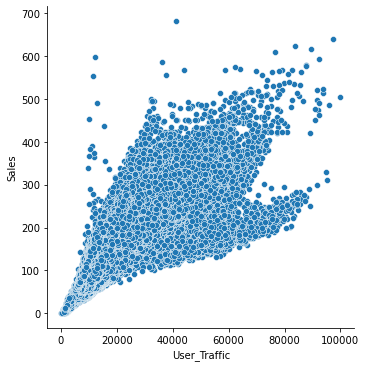

In [22]:
sns.relplot(x="User_Traffic", y="Sales", data=train)

* So we see a Highly linear relationship for the User_traffic and Sales i.e. target variable

**Hypothesis 7: If Competition is more then sales will be less**

In [23]:
train['Competition_Metric'].describe()

count    512087.000000
mean          0.073213
std           0.099968
min           0.000000
25%           0.010000
50%           0.035000
75%           0.094000
max           0.768000
Name: Competition_Metric, dtype: float64

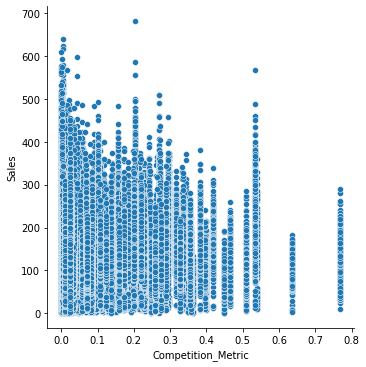

In [24]:
sns.relplot(x="Competition_Metric", y="Sales", data=train)

* So we see a trend as competition metrics increases there is a decrease in sales trend

### Feature Engineering

In [116]:
## Dropping User_Traffic variable as we dont have that in test variable
train.drop('User_Traffic', axis=1, inplace=True)

In [117]:
# Creating week day variable from Day_no variabe

train['Week_day']=train['Day_No'].apply(lambda x:x%7)
test['Week_day']=test['Day_No'].apply(lambda x:x%7)

In [118]:
# Creating dummies for categorical variables

train = pd.get_dummies(train,columns=['Course_Domain','Course_Type'], drop_first=True)
test = pd.get_dummies(test,columns=['Course_Domain','Course_Type'], drop_first=True)

<AxesSubplot:>

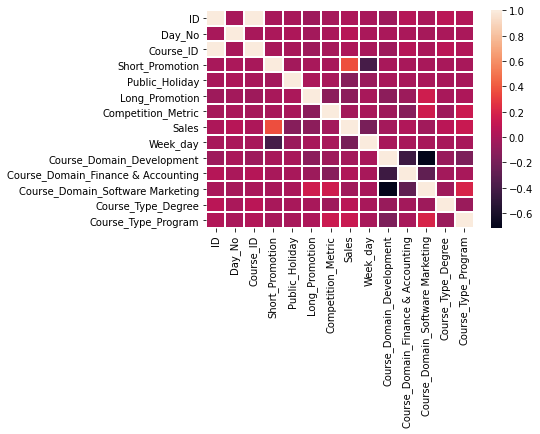

In [28]:
corr = train.corr(method = 'pearson')
sns.heatmap(corr, linewidths=1)

So we see quite a relationships.

In [119]:
# Dropping ID column 
train.drop('ID',axis=1,inplace=True)
test.drop('ID',axis=1,inplace=True)

In [120]:
# Splitting train data for test and validations

x = train.drop(['Sales'], axis=1)
y = train['Sales']
x.shape, y.shape

((512087, 12), (512087,))

In [121]:
# importing the train test split function
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 95, test_size = 0.20)

### Doing power transformations for the variable with outliers

In [122]:
from sklearn.preprocessing import PowerTransformer, StandardScaler

sc = StandardScaler()

train_x = sc.fit_transform(train_x)
test_x = sc.fit_transform(test_x)
test = sc.fit_transform(test)


test_x.shape, train_x.shape, test.shape

((102418, 12), (409669, 12), (36000, 12))

In [123]:
## Building model

import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error 

model = xgb.XGBRegressor()

model.fit(train_x, train_y)
# make training prediction
train_yhat = model.predict(train_x)
r2_train_score = r2_score(train_y, train_yhat)
mse_train_score = mean_squared_error(train_y, train_yhat)

# make test prediction
test_yhat = model.predict(test_x)
r2_test_score =  r2_score(test_y, test_yhat)
mse_test_score = mean_squared_error(test_y, test_yhat)

mse_train_score, mse_test_score

(374.68698755095755, 817.5029224121353)

In [48]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_dist = {"max_depth": [5, 10, 15],
              "n_estimators": [100, 200, 300],
              "learning_rate": [0.05, 0.1, 0.15, 0.2, 0.3],
             "reg_alpha": [0, 0.01, 0.1, 1, 10],
             "reg_lambda": [0, 0.01, 0.1, 1, 10]}

grid_search = RandomizedSearchCV(model, param_dist, cv = 3, n_iter = 30,  
                                   verbose=10, n_jobs=-1, scoring = "neg_root_mean_squared_error")

grid_search.fit(train_x, train_y)

grid_search.best_estimator_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\Anaconda\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=10, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=10,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=10, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

model.fit(train_x, train_y)
# make training prediction
train_yhat = model.predict(train_x)
mse_train_score = mean_squared_error(train_y, train_yhat)

# make test prediction
test_yhat = model.predict(test_x)
mse_test_score = mean_squared_error(test_y, test_yhat)

mse_train_score, mse_test_score

(99.2188877634266, 328.3225518890741)

#### Now using train data to train model for predicting User traffic and predict for test data

In [42]:
# Calling train and test data again

train1 = pd.read_csv('train.csv')
test1 = pd.read_csv('test.csv')

train1.drop('Sales', axis=1, inplace=True)

train1.fillna(train['Competition_Metric'].median(),inplace=True)
test1.fillna(train['Competition_Metric'].median(),inplace=True)

# Creating week day variable from Day_no variabe

train1['Week_day']=train1['Day_No'].apply(lambda x:x%7)
test1['Week_day']=test1['Day_No'].apply(lambda x:x%7)

train1 = pd.get_dummies(train1,columns=['Course_Domain','Course_Type'], drop_first=True)
test1 = pd.get_dummies(test1,columns=['Course_Domain','Course_Type'], drop_first=True)

# Dropping ID column 
train1.drop('ID',axis=1,inplace=True)
test1.drop('ID',axis=1,inplace=True)



In [43]:
# Splitting train and test data

x = train1.drop(['User_Traffic'], axis=1)
y = train1['User_Traffic']
x.shape, y.shape

((512087, 12), (512087,))

In [44]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 95, test_size = 0.20)

In [45]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

train_x = pt.fit_transform(train_x)
test_x = pt.fit_transform(test_x)


test_x.shape, train_x.shape

((102418, 12), (409669, 12))

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error 


lr = LinearRegression()
lr.fit(train_x, train_y)
# make training prediction
train_yhat = lr.predict(train_x)
mse_train_score = mean_squared_error(train_y, train_yhat)

# make test prediction
test_yhat = lr.predict(test_x)
mse_test_score = mean_squared_error(test_y, test_yhat)

mse_train_score, mse_test_score

(40371769.51833785, 39968551.06797232)

In [47]:
#Creating User traffic data

test1_yhat = lr.predict(test1)
test1_yhat

array([105354.7743993 , 105070.33228136, 104785.89016341, ...,
       176287.07856708, 176002.63644914, 175718.1943312 ])

In [51]:
result = pd.DataFrame({'User_Traffic': test1_yhat})

In [53]:
test_final = pd.concat([test1,result], axis=1)

In [54]:
test_final

,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Week_day,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program,User_Traffic
0,883,1,1,0,1,0.007,1,1,0,0,0,0,105354.774399
1,884,1,1,0,1,0.007,2,1,0,0,0,0,105070.332281
2,885,1,1,0,1,0.007,3,1,0,0,0,0,104785.890163
3,886,1,1,0,1,0.007,4,1,0,0,0,0,104501.448045
4,887,1,0,0,1,0.007,5,1,0,0,0,0,102850.010708
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,938,600,1,0,1,0.070,0,0,0,1,0,1,176855.962803
35996,939,600,1,0,1,0.070,1,0,0,1,0,1,176571.520685
35997,940,600,1,0,1,0.070,2,0,0,1,0,1,176287.078567
35998,941,600,1,0,1,0.070,3,0,0,1,0,1,176002.636449


In [56]:
train = pd.read_csv('train.csv')
train.fillna(train['Competition_Metric'].median(),inplace=True)

train['Week_day']=train['Day_No'].apply(lambda x:x%7)

train = pd.get_dummies(train,columns=['Course_Domain','Course_Type'], drop_first=True)

train.drop('ID',axis=1,inplace=True)

X = train.drop(['Sales'], axis=1)
Y = train['Sales']
X.shape, Y.shape

((512087, 13), (512087,))

In [57]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state = 45, test_size = 0.30)

In [58]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

test_final = pt.fit_transform(test_final)
train_x = pt.fit_transform(train_x)
test_x = pt.fit_transform(test_x)


test_x.shape, train_x.shape, test_final.shape


((153627, 13), (358460, 13), (36000, 13))

In [67]:
## Building model

import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error 

model = xgb.XGBRegressor()

model.fit(train_x, train_y)
# make training prediction
train_yhat = model.predict(train_x)
r2_train_score = r2_score(train_y, train_yhat)
mse_train_score = mean_squared_error(train_y, train_yhat)

# make test prediction
test_yhat = model.predict(test_x)
r2_test_score =  r2_score(test_y, test_yhat)
mse_test_score = mean_squared_error(test_y, test_yhat)

mse_train_score, mse_test_score

(74.26604442604467, 109.35217986849197)

In [68]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_dist = {"max_depth": [5, 10, 15],
              "n_estimators": [100, 200, 300],
              "learning_rate": [0.05, 0.1, 0.15, 0.2, 0.3],
             "reg_alpha": [0, 0.01, 0.1, 1, 10],
             "reg_lambda": [0, 0.01, 0.1, 1, 10]}

grid_search = RandomizedSearchCV(model, param_dist, cv = 3, n_iter = 30,  
                                   verbose=10, n_jobs=-1, scoring = "neg_root_mean_squared_error")

grid_search.fit(train_x, train_y)

grid_search.best_estimator_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\Anaconda\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=10, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [130]:
model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=15,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=10, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

model.fit(train_x, train_y)
# make training prediction
train_yhat = model.predict(train_x)
mse_train_score = mean_squared_error(train_y, train_yhat)

# make test prediction
test_yhat = model.predict(test_x)
mse_test_score = mean_squared_error(test_y, test_yhat)

mse_train_score, mse_test_score

(81.07678666865495, 347.7994395533459)

**-> Seems model is kind of overfitting**

### So using the original model without user traffic to predict sales

In [124]:
# make test prediction
test_yhat_final = model.predict(test)
test_yhat_final

array([127.87746 , 118.82756 ,  97.1579  , ..., 121.533646, 128.7199  ,
       132.79489 ], dtype=float32)

In [125]:
df1 = pd.read_csv('test.csv')

In [126]:
result = pd.DataFrame({"ID": df1['ID'], 'Sales': test_yhat_final})

In [127]:
result

,ID,Sales
0,883,127.877457
1,884,118.827560
2,885,97.157898
3,886,94.973267
4,887,53.379284
...,...,...
35995,548083,164.797989
35996,548084,148.011444
35997,548085,121.533646
35998,548086,128.719894


In [128]:
result.to_csv('sub11.csv',index=False) 